<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PAC 4. Redes Neuronales**

## Introducción

En este ejercicio práctico estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de pueblos prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes sepan aplicar sus conocimientos a su trabajo o vocación de una forma profesional y posean las competencias que suelen demostrarse por medio de la elaboración y defensa de argumentos y la resolución de problemas dentro de su área de estudio.
- Diseñar y construir aplicaciones analíticas mediante técnicas de desarrollo, integración y reutilización de componentes software.
- Buscar, gestionar y utilizar la información más adecuada para modelizar problemas concretos y aplicar adecuadamente procedimientos teóricos para su resolución de forma autónoma y creativa.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Conocer las distintas partes que forman una red neuronal así como las técnicas de entrenamiento de las mismas.
- Realizar un análisis de los resultados obtenidos con diversas arquitecturas de redes neuronales en problemas de clasificación utilizando las métricas de evaluación comunes para estos problemas.
- Familiarización con librerías de programación de redes neuronales a través de ejemplos.
- Detectar qué tipo de red es la más indicada para un problema concreto. Una vez detectada, implementar la arquitectura usando librerías de aprendizaje profundo.

## Descripción de la PEC

Para ello, en este notebook deberá realizar 2 ejercicios:

1. Crear una red neuronal convolucional (CNN) simple para clasificar imágenes. Conseguir una precisión lo más alta posible.

2. Entrenar una red neuronal con la estrategia de transfer learning para un caso binario.



 


### Classificación de imagenes

En el campo de la visión por computador existen diferentes tareas que podemos realizar para analizar una imagen. Algunas de estas tareas se muestran en la siguiente figura:

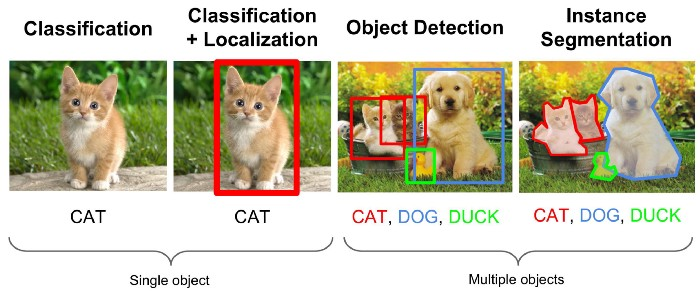

<div style="font-size:3">Fuente de la imagen: https://medium.com/@sidereal/all-you-need-to-know-about-computer-vision-3997bc6318a6 </div>



En esta PAC trabajaremos con la tarea más común: la clasificación de imágenes. Por ejemplo: clasificar las imágenes en función de qué animal aparece: gato, perro, pato, etc.

Una red neuronal para la clasificación de imágenes tiene como entrada una imagen y como salida **un valor por cada clase que queremos predecir**.

## Codigo de referéncia

Para resolver esta PAC dispones de los notebooks de la asignatura referentes a este capítulo:
https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/tree/master/5_neural_networks_examples

Además, en esta PEC os daremos algunas funciones ya implementadas para introducir el problema que queremos resolver y que debereis utilizar/modificar para realizar los ejercicios.

Ante todo nos aseguramos que tenemos instaladas las librerías de Python necesarias.

In [ ]:
! pip install -q matplotlib tensorflow numpy scikit-image

Importamos los módulos de Python que necesitaremos:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from skimage.transform import resize
import matplotlib.pyplot as plt

**IMPORTANTE:** Cuando trabajamos con la librería de deep learning `keras` debemos asegurarnos de que estamos utilizando una instancia de Colab de tipo "GPU". Si no el entrenamiento de nuestras redes será hasta 10 veces más lento.

Para cambiar el tipo de instancia de Colab debéis ir al menú superior "Runtime" -> "Change Runtime Type" -> "GPU".

In [ ]:
print('Check GPU runtime type... ')
if len(tf.config.list_physical_devices('GPU')) == 0:
  print('Change Runtype Type in top menu for GPU acceleration')
else:
  print('OK!')

Check GPU runtime type... 
Change Runtype Type in top menu for GPU acceleration


## EJERCICIO 1: Crear una red neuronal convolucional (CNN) simple para clasificar imágenes

En este ejercicio deberéis crear una red neuronal convolucional (CNN) para clasificar imágenes.

Podéis utilizar un modelo CNN sencillo similar al ejemplo del notebook [01_CNN_MNIST.ipynb](https://gitlab.uoclabs.uoc.es/aprendizaje_automatic/aprendizaje_automatic/-/blob/master/5_neural_networks_examples/01_CNN_MNIST.ipynb) de clasificación imágenes que tiene en el repositorio de la asignatura.

Fijaros en que la entrada debe definir el mismo tamaño que las imágenes del dataset y que la capa de salida debe tener tantas neuronas como clases tenga el dataset.

### 1.1 Cargar los datos [0.5 puntos]

En este ejercicio utilizaremos el dataset [CIFAR10](https://www.tensorflow.org/datasets/catalog/cifar10). Utilizando como referencia el código del notebook [01_CNN_MNIST.ipynb](https://gitlab.uoclabs.uoc.es/aprendizaje_automatic/aprendizaje_automatic/-/blob/master/5_neural_networks_examples/01_CNN_MNIST.ipynb) carga el dataset y comprueba qué formato tiene. Muestra una imagen para comprobar que todo ha funcionado bien.

170498071/170498071 [==============================] - 2s 0us/step
(32, 32, 3)
Shape of the original train data: (50000, 32, 32, 3)
Shape of the original test data: (10000, 32, 32, 3)


(-0.5, 31.5, 31.5, -0.5)

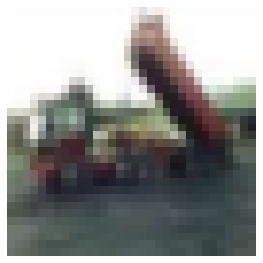

In [ ]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()

print(x_train_orig[0].shape)
# check the size of the original data
print("Shape of the original train data: {}".format(x_train_orig.shape))
print("Shape of the original test data: {}".format(x_test_orig.shape))

# Visualize the first image of the training set
first_image = x_train_orig[2]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((32, 32, 3))
plt.imshow(pixels/255, cmap='brg')
plt.tight_layout()
plt.axis('off')

### 1.2 Prepara los datos [0.5 puntos]
  - Normaliza los datos entre 0 y 1 para poder utilizarlos para entrenar los modelos
  - Convierte las etiquetas (variables y) en one_hot encoding

In [ ]:
# Find the min and max values in the training set
v_min = np.min(x_train_orig)
v_max = np.max(x_train_orig)
print("Min. and max. values before normalization are {} and {}.".format(v_min, v_max))

# Normalization
x_train_orig = (x_train_orig - v_min) / (v_max - v_min)
x_test_orig = (x_test_orig - v_min) / (v_max - v_min)

print("Min. and max. values after normalization are {} and {}.".format(np.min(x_train_orig), np.max(x_train_orig)))

x_train = x_train_orig.reshape(50000,32,32,3)
x_test = x_test_orig.reshape(10000,32,32,3)

print("Shape of the train data: {}".format(x_train.shape))
print("Shape of the test data: {}".format(x_test.shape))

y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)

print("Shape of y_train_orig is {} and the value of y_train_orig[0] is {}".format(y_train_orig.shape, y_train_orig[0]))
print("Shape of y_train is {} and the value of y_train[0] is {}".format(y_train.shape, y_train[0]))

Min. and max. values before normalization are 0 and 255.
Min. and max. values after normalization are 0.0 and 1.0.
Shape of the train data: (50000, 32, 32, 3)
Shape of the test data: (10000, 32, 32, 3)
Shape of y_train_orig is (50000, 1) and the value of y_train_orig[0] is [6]
Shape of y_train is (50000, 10) and the value of y_train[0] is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 1.3 Crear el modelo sencillo [0.5 puntos]
Puedes utilizar como referencia el modelo del notebook [01_CNN_MNIST.ipynb](https://gitlab.uoclabs.uoc.es/aprendizaje_automatic/aprendizaje_automatic/-/blob/master/5_neural_networks_examples/01_CNN_MNIST.ipynb). Comprueba que el número de clases de salida sea el mismo y adapta el input_shape para que corresponda a las imágenes del dataset CIFAR10.

In [ ]:
num_classes = len(y_train[0])

# instantiate the sequential model
model = Sequential()

# Add each layer to the model
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))

### 1.4 Compilar el modelo [0.5 puntos]

Añade el código necesario para compilar el modelo que has creado. Fijate que debe indicar la función de coste (`loss`) adecuada para un problema de clasificación. En [este enlace](https://keras.io/api/losses/) puedes consultar la documentación de las funciones de coste de `Keras`.

In [ ]:
# compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 1.5 Entrenamiento del modelo [0.5 puntos]

Añada el código necesario en la siguiente celda para entrenar tu modelo durante 30 épocas.

In [ ]:
# train the model
n_epochs = 30
mfit = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=n_epochs)

Epoch 1/30
391/391 [==============================] - 54s 136ms/step - loss: 1.5323 - accuracy: 0.4657 - val_loss: 1.3145 - val_accuracy: 0.5352
Epoch 2/30
391/391 [==============================] - 61s 155ms/step - loss: 1.2199 - accuracy: 0.5760 - val_loss: 1.2197 - val_accuracy: 0.5747
Epoch 3/30
391/391 [==============================] - 50s 129ms/step - loss: 1.1121 - accuracy: 0.6155 - val_loss: 1.2391 - val_accuracy: 0.5639
Epoch 4/30
391/391 [==============================] - 50s 127ms/step - loss: 1.0273 - accuracy: 0.6461 - val_loss: 1.1935 - val_accuracy: 0.5853
Epoch 5/30
391/391 [==============================] - 54s 139ms/step - loss: 0.9579 - accuracy: 0.6695 - val_loss: 1.1840 - val_accuracy: 0.5937
Epoch 6/30
391/391 [==============================] - 53s 135ms/step - loss: 0.8937 - accuracy: 0.6936 - val_loss: 1.1363 - val_accuracy: 0.6070
Epoch 7/30
391/391 [==============================] - 52s 132ms/step - loss: 0.8342 - accuracy: 0.7158 - val_loss: 1.1255 - val_ac

### 1.6 Visualizar las curvas de la función de coste durante el proceso de entrenamiento [0.5 puntos]

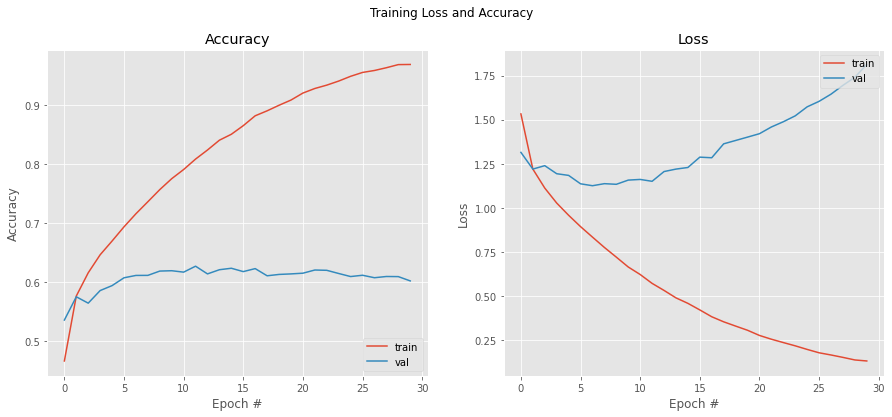

In [ ]:
# añadir aquí el codigo para visualizar las curvas de la función de coste 
# en los conjuntos de datos de entrenamiento y validación durante el entrenamiento del modelo.

# plot accuracy and loss
def plot_prediction(n_epochs, mfit):
    N = n_epochs
    plt.style.use("ggplot")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    fig.suptitle('Training Loss and Accuracy')
    
    ax1.plot(np.arange(0, N), mfit.history["accuracy"], label="train")
    ax1.plot(np.arange(0, N), mfit.history["val_accuracy"], label="val")
    ax1.set_title("Accuracy")
    ax1.set_xlabel("Epoch #")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc="lower right")
    
    ax2.plot(np.arange(0, N), mfit.history["loss"], label="train")
    ax2.plot(np.arange(0, N), mfit.history["val_loss"], label="val")
    ax2.set_title("Loss")
    ax2.set_xlabel("Epoch #")
    ax2.set_ylabel("Loss")
    ax2.legend(loc="upper right")
    
    plt.show()

plot_prediction(n_epochs, mfit)

### 1.7 Análisis de los resultados [0.5 puntos]

Comenta los resultados obtenidos hasta el momento. ¿Consideras que el modelo se está entrenando correctamente? ¿Habría que mejorarlo?

Vemos que el modelo está sufriendo de overfitting. El modelo está funcionando casi a la perfección en el set de entrenamiento pero la accuracy en el set de validación no mejora. En el próximo ejercicio intentaremos mejorarlo utilizando un modelo más complejo.



### 1.8 Entrenamiento con modelo más complejo [1 punto]

Prueba varios modelos hasta obtener uno que mejore el 75% de accuracy en validación.

In [ ]:

model = Sequential()


model.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation="softmax"))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

n_epochs = 30
mfit = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=n_epochs)



Epoch 1/30
391/391 [==============================] - 77s 195ms/step - loss: 1.7819 - accuracy: 0.3288 - val_loss: 1.4243 - val_accuracy: 0.4853
Epoch 2/30
391/391 [==============================] - 74s 189ms/step - loss: 1.4273 - accuracy: 0.4770 - val_loss: 1.2328 - val_accuracy: 0.5492
Epoch 3/30
391/391 [==============================] - 77s 197ms/step - loss: 1.2910 - accuracy: 0.5343 - val_loss: 1.1961 - val_accuracy: 0.5743
Epoch 4/30
391/391 [==============================] - 74s 190ms/step - loss: 1.2087 - accuracy: 0.5696 - val_loss: 1.1543 - val_accuracy: 0.5912
Epoch 5/30
391/391 [==============================] - 75s 192ms/step - loss: 1.1357 - accuracy: 0.5966 - val_loss: 0.9938 - val_accuracy: 0.6544
Epoch 6/30
391/391 [==============================] - 75s 192ms/step - loss: 1.0825 - accuracy: 0.6186 - val_loss: 0.9649 - val_accuracy: 0.6631
Epoch 7/30
391/391 [==============================] - 75s 193ms/step - loss: 1.0378 - accuracy: 0.6341 - val_loss: 0.9155 - val_ac

### 1.9 Visualiza las curvas y compara los resultados obtenidos con el caso anterior [0.5 puntos]

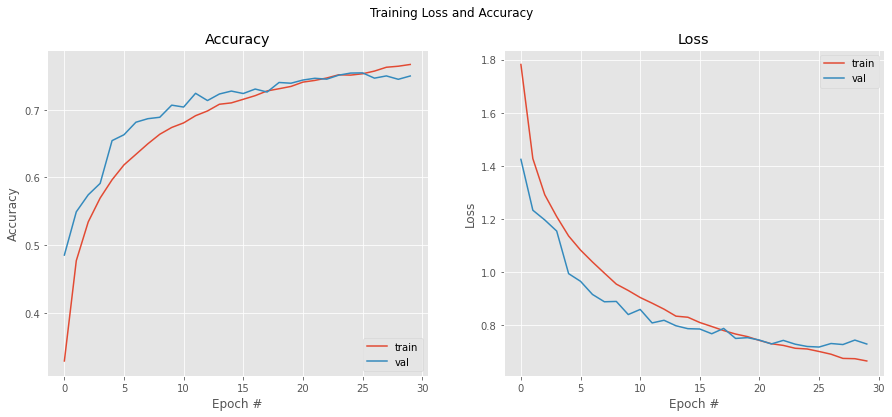

In [ ]:
plot_prediction(n_epochs, mfit)

Vemos que en este caso la accuracy de entrenamiento y la de validación son mucho más parecidas, haber utilizado un modelo más complejo y añadir la capa de `Dropout` ha sido clave para obtener este resultado.

## EJERCICIO 2: Entrenar una red neuronal con la estrategia de transfer learning para un caso binario

En este caso utilizaremos el notebook de [transfer learning](https://gitlab.uoclabs.uoc.es/aprendizaje_automatic/aprendizaje_automatic/-/blob/master/5_neural_networks_examples/02_CNN_Transfer_Learning.ipynb) como referencia para entrenar una red neuronal.

En primer lugar cargaremos el dataset "horses or humans" de Tensorflow:

https://www.tensorflow.org/datasets/catalog/horses_or_humans


Utilizaremos el 80% de los datos para el entrenamiento, el 10% para la validación y el 10% para test.

In [ ]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

train_ds, validation_ds, test_ds = tfds.load(
    "horses_or_humans",
    # Reserve 10% for validation and 10% for test
    split=["train[:80%]", "train[80%:90%]", "train[90%:100%]"],
    as_supervised=True,  # Include labels
)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print(
    "Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds)
)
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

Dataset horses_or_humans downloaded and prepared to ~/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
Number of training samples: 822
Number of validation samples: 102
Number of test samples: 103


Ejecuta la siguiente celda para visualizar unas imágenes del datset:

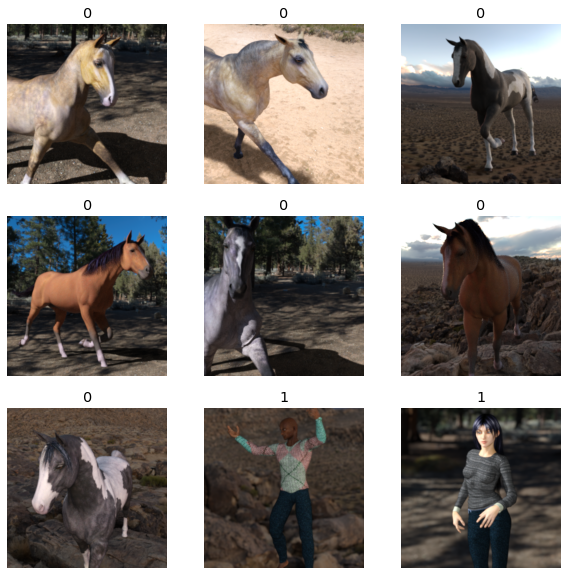

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

A continuación haremos un `resize` de las imágenes para trabajar con imágenes de tamaño 100x100:

In [ ]:
size = (100, 100)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

También habrá que preparar los batches y el dataset para realizar el entrenamiento:

In [ ]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

### 2.1 Prepara el código para hacer data augmentation [1 punto]

Sigue la información de la siguiente página para hacerlo:

https://www.tensorflow.org/tutorials/images/data_augmentation

Aplica por lo menos:
  - Random Flip
  - RandomRotation

Prueba diferentes valores para el parámetro RandomRotation. Quédate con el que te parezca adecuado después de ver las imágenes generadas.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

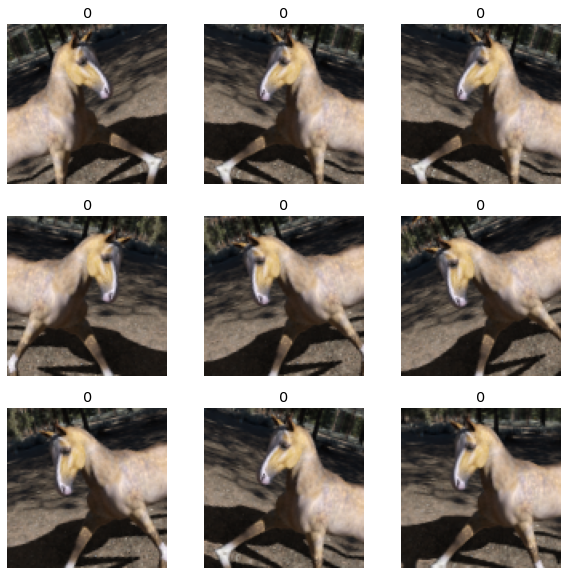

In [ ]:
# codigo para visualizar las imagenes:
import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

### 2.2 Cargar la red (backbone) [1 punto]
En este paso, utilizaremos una red ResNet50 preentrenada en el conjunto de datos Imagenet, congelaremos la base convolucional creada a partir del paso anterior para realizar el transfer learning a nuestro dataset.
Especifica los argumentos `include_top=False` y `pooling='avg'` para cargar una red que no incluye la última capa de clasificación en la parte superior. Recuerda adaptar el tamaño de la red a las dimensiones de las imágenes de nuestro dataset.

In [ ]:
IMG_SHAPE = size + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               pooling='avg',
                                               weights='imagenet')

#print(base_model.summary())

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 2048)


### 2.3 Extracción de características [1 punto]

En este paso, debemos congelar el backbone creado en el apartado anterior para utilizarlo como extractor de características (en ingles `features`). A continuación, añade una capa de clasificación y entrenala con nuestros datos de entrenamiento. Crea las celdas de código que creas necesarias para realizar la solución.

In [ ]:
# prevent the weights in a given layer from being updated during training
base_model.trainable = False

In [ ]:
# add a classification layer 
# for two classes we only need one output neuron (positive numbers predict class 1, negative numbers predict class 0)
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch)
print(prediction_batch.shape)

(32, 1)


In [ ]:
preprocess_input = tf.keras.applications.resnet.preprocess_input


inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 100, 100, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 100, 100, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                             

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,
                    epochs=15,
                    validation_data=validation_ds)

Epoch 1/15
26/26 [==============================] - 51s 2s/step - loss: 0.7789 - accuracy: 0.6010 - val_loss: 0.4272 - val_accuracy: 0.8529
Epoch 2/15
26/26 [==============================] - 41s 2s/step - loss: 0.5017 - accuracy: 0.7640 - val_loss: 0.2715 - val_accuracy: 0.9216
Epoch 3/15
26/26 [==============================] - 42s 2s/step - loss: 0.3673 - accuracy: 0.8321 - val_loss: 0.1897 - val_accuracy: 0.9608
Epoch 4/15
26/26 [==============================] - 43s 2s/step - loss: 0.2814 - accuracy: 0.8808 - val_loss: 0.1356 - val_accuracy: 0.9706
Epoch 5/15
26/26 [==============================] - 43s 2s/step - loss: 0.2244 - accuracy: 0.9124 - val_loss: 0.1136 - val_accuracy: 0.9804
Epoch 6/15
26/26 [==============================] - 43s 2s/step - loss: 0.2011 - accuracy: 0.9270 - val_loss: 0.0862 - val_accuracy: 0.9902
Epoch 7/15
26/26 [==============================] - 41s 2s/step - loss: 0.1708 - accuracy: 0.9307 - val_loss: 0.0749 - val_accuracy: 0.9902
Epoch 8/15
26/26 [==

### 2.4 Fine-tuning [1 punto]

En el ejercicio 2.2 de extracción de características, sólo hemos entrenado la última capa `Dense` sobre un modelo base ResNet50. Los pesos de la red preentrenada no se han actualizado durante el entrenamiento. En este ejercicio, reentrenaremos nuestro modelo pero actualizando todos los pesos durante el entrenamiento. Crea las celdas de código que creas necesarias para realizar la solución.

In [ ]:
base_model.trainable = True

# add a classification layer 
# for two classes we only need one output neuron (positive numbers predict class 1, negative numbers predict class 0)
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch)
print(prediction_batch.shape)

(32, 1)


In [ ]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model_ft = tf.keras.Model(inputs, outputs)

print(model_ft.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 100, 100, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 100, 100, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0   

In [ ]:
base_learning_rate = 0.0001
model_ft.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_ft = model.fit(train_ds,
                    epochs=15,
                    validation_data=validation_ds)

Epoch 1/15
26/26 [==============================] - 42s 2s/step - loss: 0.0768 - accuracy: 0.9745 - val_loss: 0.0294 - val_accuracy: 0.9902
Epoch 2/15
26/26 [==============================] - 42s 2s/step - loss: 0.0796 - accuracy: 0.9745 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 3/15
26/26 [==============================] - 41s 2s/step - loss: 0.0843 - accuracy: 0.9684 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 4/15
26/26 [==============================] - 42s 2s/step - loss: 0.0629 - accuracy: 0.9842 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 5/15
26/26 [==============================] - 41s 2s/step - loss: 0.0540 - accuracy: 0.9781 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 6/15
26/26 [==============================] - 41s 2s/step - loss: 0.0578 - accuracy: 0.9830 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 7/15
26/26 [==============================] - 42s 2s/step - loss: 0.0626 - accuracy: 0.9805 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 8/15
26/26 [==

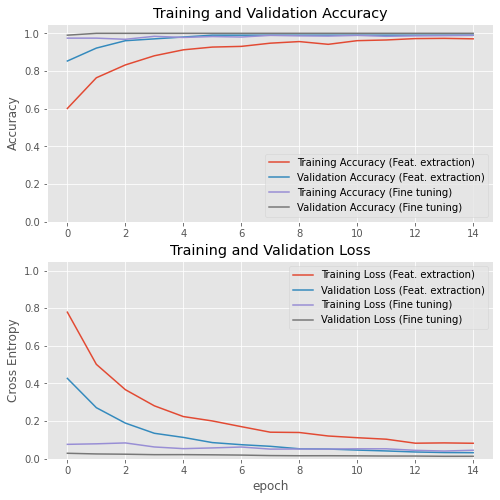

In [ ]:
acc_ex = history.history['accuracy']
val_acc_ex = history.history['val_accuracy']
loss_ex = history.history['loss']
val_loss_ex = history.history['val_loss']

acc_ft = history_ft.history['accuracy']
val_acc_ft = history_ft.history['val_accuracy']
loss_ft = history_ft.history['loss']
val_loss_ft = history_ft.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_ex, label='Training Accuracy (Feat. extraction)')
plt.plot(val_acc_ex, label='Validation Accuracy (Feat. extraction)')
plt.plot(acc_ft, label='Training Accuracy (Fine tuning)')
plt.plot(val_acc_ft, label='Validation Accuracy (Fine tuning)')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.05])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_ex, label='Training Loss (Feat. extraction)')
plt.plot(val_loss_ex, label='Validation Loss (Feat. extraction)')
plt.plot(loss_ft, label='Training Loss (Fine tuning)')
plt.plot(val_loss_ft, label='Validation Loss (Fine tuning)')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.05])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### 2.5 Comparación con entrenamiento sin el backbone pre-entrenado [1 punto]

Coge el código necesario de los ejercicios 2.2, 2.3 y 2.4 para entrenar la red sin los pesos preentrenados (sin los pesos de imagenet: ResNet50 con los pesos aleatorios ( https://www.tensorflow.org/api_docs/python/tf /keras/applications/resnet50/ResNet50 )

¿Los resultados que obtienes son los mismos? ¿Habría sido útil crear funciones para no tener que copiar todo el código? Razona la respuesta

Los resultados obtenidos con weights=None son mucho más malos que con la red pre-entrenada. La accuracy con la red pre-entrenada a validación es perfecta, mientras que con weights=None la accuracy no llega a 0.7.

De esta forma vemos las bondades de transfer learning. Si entrenamos con una red pre-entrenada en un dataset grande (imagenet), podemos adaptarla para que realice una tarea en un dataset más pequeño. Si partimos de una red con los pesos aleatorios es más difícil conseguir buenos resultados. Hubiera sido muy útil haber creado funciones para ejecutar el código, ya que sólo hemos tenido que cambiar un parámetro pero necesitamos copiar muchas líneas de código.

## **Rúbrica**

La nota de los distintos ejercicios es la siguiente:

- Ejercicio 1: 50%. Para obtener la máxima puntuación debes conseguir que tu modelo compile y entrene sin errores, y visualizar las curvas de la función de coste correctamente. Es necesario Razonar las respuestas.
- Ejercicio 2: 50%. Para obtener la máxima puntuación debes implementar los dos métodos de transfer learning y responder a las preguntas correctamente justificando tus respuestas.



## **Fuentes y recursos de interés:**:
- https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
- https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/ 
- https://keras.io/api/losses/
